# Ответы на вопросы тестового задания компании Sputnik

Выполнил: Денисенко Федор Владимирович

In [3]:
# загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
data = pd.read_csv('events_filters_2022.csv')
data.head(5)

,event_category,event_action,event_label,total_events,unique_events
0,city_landing,price_button_submit,Tula / Показать предложения (11),8,7
1,city_landing,price_button_submit,Sochi / Показать предложения (39),12,10
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2


# 1 вопрос. Сколько людей пользуются фильтрами?

Чтобы пользоваться фильтрами, нужно в итоге нажать кнопку: "Показать предложения", а значит применить фильтр. Исходя из этого, число уникальных пользователей, применивших фильтр, является ответом на вопрос. 

P.S.: Стоит отметить, что по имеющимся данным, число людей, которые пользуются фильтры одно, но реальное число таких людей немного меньше, ведь каждый уникальный пользователь может искать экскурсии в разных городах, а значит он будет засчитываться системой как уникальный в нескольких строках. Этот  факт невозможно учесть в предоставленных данных. Его можно учесть при наличии уникальных id пользователей
    

In [4]:
data\
    .query('event_action == "price_button_submit"')\
    .unique_events\
    .sum()

63063

Ответ: примерно 63063 человека пользуются фильтрами, не больше. Возможно чуть меньше. Точное число не определить из-за неполноты данных.

# 2 вопрос. В каких городах фильтрами пользуются больше? В каких меньше?

Необходимо разбить строки из столбца event_label на части и взять только название города.

In [5]:
data['City'] = data\
                .event_label\
                .apply(lambda x: x.split('/')[0])
data.head(5)

,event_category,event_action,event_label,total_events,unique_events,City
0,city_landing,price_button_submit,Tula / Показать предложения (11),8,7,Tula
1,city_landing,price_button_submit,Sochi / Показать предложения (39),12,10,Sochi
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2,Penza
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1,Gelendzhik
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2,Moscow


In [6]:
# в max_filter_using показаны города с наибольшим количеством использованных фильтров
max_filter_using=data\
                    .query('event_action == "price_button_submit"')\
                    .groupby('City', as_index=False)\
                    .agg({'total_events':'sum'})\
                    .sort_values('total_events', ascending=False)
max_filter_using.head(5)

,City,total_events
132,Kaliningrad,6113
262,Saint Petersburg,5601
197,Moscow,3598
286,Sochi,3286
124,Istanbul,2778


In [7]:
# в min_filter_using показаны города с наименьшим количеством использованных фильтров
min_filter_using=data\
                    .query('event_action == "price_button_submit"')\
                    .groupby('City', as_index=False)\
                    .agg({'total_events':'sum'})\
                    .sort_values('total_events')
min_filter_using.head(5)

,City,total_events
170,Lloret de Mar,1
206,Nevyansk,1
41,Bethlehem,1
42,Bibione,1
218,Orekhovo-Zuyevo,1


In [8]:
#количество городов с наименьшим количеством использований
min_filter_using\
                .query('total_events == 1')\
                .count()

City            50
total_events    50
dtype: int64

In [9]:
min_filter_using=min_filter_using.head(50)
min_filter_using

,City,total_events
170,Lloret de Mar,1
206,Nevyansk,1
41,Bethlehem,1
42,Bibione,1
218,Orekhovo-Zuyevo,1
302,Tarusa,1
48,Bremen,1
127,Izborsk,1
298,Sviyazhsk,1
220,Padova,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Частота использования')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


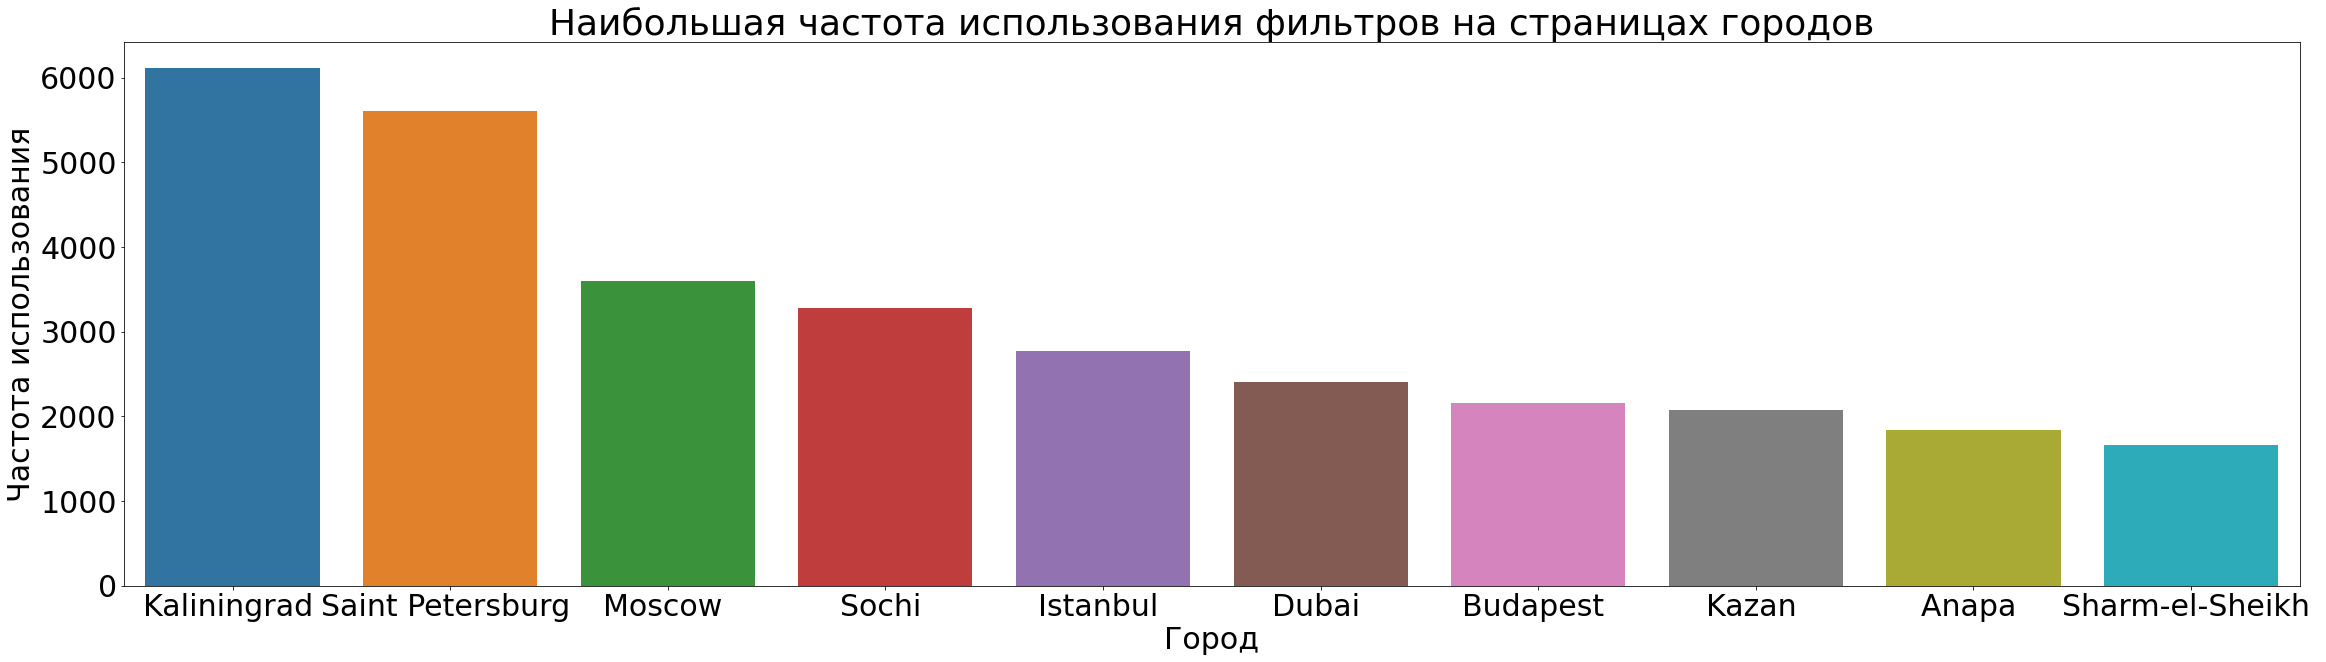

In [10]:
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax2=sns.barplot(max_filter_using.head(10).City,max_filter_using.head(10).total_events)
ax2.set_title('Наибольшая частота использования фильтров на страницах городов')
ax2.set_xlabel('Город')
ax2.set_ylabel('Частота использования')

Ответ: 
1). Больше всего фильтрами пользуются при поиске в городе Калининград (6113 раза), затем при поиске в Санкт-петербурге (5601 раза), и в Москве (3598 раза).

2). Меньше всего пользуются фильтрами при поиске в 50 городах. Среди них Lloret de Mar, Nevyansk, Bethlehem и другие (у всех по 1 применению фильтра).



# 3 вопрос. Какие разделы фильтров наиболее востребованы? "Фильтры", "Сортировка", "Категории"?




Нужно произвести расчет числа кликов по категориям, по фильтрам и по всем сортровкам в отдельности. Затем сравнить эти три числа между собой.

In [11]:
Kategory_T_F = data\
                    .query('event_action == "search-tools-button_open"')
Kategory_T_F

,event_category,event_action,event_label,total_events,unique_events,City
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2,Penza
13,city_landing,search-tools-button_open,Crete / Фильтры Выбрано: 1,9,9,Crete
18,city_landing,search-tools-button_open,Irkutsk / КБЖД,2,2,Irkutsk
22,city_landing,search-tools-button_open,Adler / КАКИЕ ЭКСКУРСИИ В АДЛЕРЕ,1,1,Adler
27,city_landing,search-tools-button_open,Haifa / Категории Все,4,4,Haifa
...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,Tbilisi / Категории Обзорные,1,1,Tbilisi
19070,city_landing,search-tools-button_open,Alanya / Морские прогулки,6,5,Alanya
19079,city_landing,search-tools-button_open,Anapa / В Крым,5,4,Anapa
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32,Istanbul


In [12]:
#создание столбца, который при True показывает, что эта строка из Категорий
Kategory_T_F['T_F'] = Kategory_T_F["event_label"].str.contains("Категории", regex=False)
Kategory_T_F

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_category,event_action,event_label,total_events,unique_events,City,T_F
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2,Penza,False
13,city_landing,search-tools-button_open,Crete / Фильтры Выбрано: 1,9,9,Crete,False
18,city_landing,search-tools-button_open,Irkutsk / КБЖД,2,2,Irkutsk,False
22,city_landing,search-tools-button_open,Adler / КАКИЕ ЭКСКУРСИИ В АДЛЕРЕ,1,1,Adler,False
27,city_landing,search-tools-button_open,Haifa / Категории Все,4,4,Haifa,True
...,...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,Tbilisi / Категории Обзорные,1,1,Tbilisi,True
19070,city_landing,search-tools-button_open,Alanya / Морские прогулки,6,5,Alanya,False
19079,city_landing,search-tools-button_open,Anapa / В Крым,5,4,Anapa,False
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32,Istanbul,False


In [13]:
Kategory_T_F.query('T_F == True').total_events.sum()

11844

In [14]:
Filters_T_F = data\
                    .query('event_action == "search-tools-button_open"')
Filters_T_F

,event_category,event_action,event_label,total_events,unique_events,City
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2,Penza
13,city_landing,search-tools-button_open,Crete / Фильтры Выбрано: 1,9,9,Crete
18,city_landing,search-tools-button_open,Irkutsk / КБЖД,2,2,Irkutsk
22,city_landing,search-tools-button_open,Adler / КАКИЕ ЭКСКУРСИИ В АДЛЕРЕ,1,1,Adler
27,city_landing,search-tools-button_open,Haifa / Категории Все,4,4,Haifa
...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,Tbilisi / Категории Обзорные,1,1,Tbilisi
19070,city_landing,search-tools-button_open,Alanya / Морские прогулки,6,5,Alanya
19079,city_landing,search-tools-button_open,Anapa / В Крым,5,4,Anapa
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32,Istanbul


In [15]:
#создание столбца, который при True показывает, что эта строка из Фильтров
Filters_T_F['T_F'] = Filters_T_F["event_label"].str.contains("Фильтры", regex=False)
Filters_T_F

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_category,event_action,event_label,total_events,unique_events,City,T_F
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2,Penza,False
13,city_landing,search-tools-button_open,Crete / Фильтры Выбрано: 1,9,9,Crete,True
18,city_landing,search-tools-button_open,Irkutsk / КБЖД,2,2,Irkutsk,False
22,city_landing,search-tools-button_open,Adler / КАКИЕ ЭКСКУРСИИ В АДЛЕРЕ,1,1,Adler,False
27,city_landing,search-tools-button_open,Haifa / Категории Все,4,4,Haifa,False
...,...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,Tbilisi / Категории Обзорные,1,1,Tbilisi,False
19070,city_landing,search-tools-button_open,Alanya / Морские прогулки,6,5,Alanya,False
19079,city_landing,search-tools-button_open,Anapa / В Крым,5,4,Anapa,False
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32,Istanbul,False


In [16]:
Filters_T_F.query('T_F == True').total_events.sum()

22084

In [17]:
Sort_T_F = data\
                    .query('event_action == "search-tools-button_open"')
Sort_T_F

,event_category,event_action,event_label,total_events,unique_events,City
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2,Penza
13,city_landing,search-tools-button_open,Crete / Фильтры Выбрано: 1,9,9,Crete
18,city_landing,search-tools-button_open,Irkutsk / КБЖД,2,2,Irkutsk
22,city_landing,search-tools-button_open,Adler / КАКИЕ ЭКСКУРСИИ В АДЛЕРЕ,1,1,Adler
27,city_landing,search-tools-button_open,Haifa / Категории Все,4,4,Haifa
...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,Tbilisi / Категории Обзорные,1,1,Tbilisi
19070,city_landing,search-tools-button_open,Alanya / Морские прогулки,6,5,Alanya
19079,city_landing,search-tools-button_open,Anapa / В Крым,5,4,Anapa
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32,Istanbul


In [18]:
#создание столбца, который при True показывает, что эта строка из Сортировок
Sort_T_F['T_F'] = Sort_T_F["event_label"].str.contains("Сортировка", regex=False)
Sort_T_F

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_category,event_action,event_label,total_events,unique_events,City,T_F
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2,Penza,True
13,city_landing,search-tools-button_open,Crete / Фильтры Выбрано: 1,9,9,Crete,False
18,city_landing,search-tools-button_open,Irkutsk / КБЖД,2,2,Irkutsk,False
22,city_landing,search-tools-button_open,Adler / КАКИЕ ЭКСКУРСИИ В АДЛЕРЕ,1,1,Adler,False
27,city_landing,search-tools-button_open,Haifa / Категории Все,4,4,Haifa,False
...,...,...,...,...,...,...,...
19068,city_landing,search-tools-button_open,Tbilisi / Категории Обзорные,1,1,Tbilisi,False
19070,city_landing,search-tools-button_open,Alanya / Морские прогулки,6,5,Alanya,False
19079,city_landing,search-tools-button_open,Anapa / В Крым,5,4,Anapa,False
19087,city_landing,search-tools-button_open,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ,38,32,Istanbul,False


In [19]:
Sort_T_F.query('T_F == True').total_events.sum()

9106

In [20]:
Using_different_filters=pd.DataFrame(columns = {"type","count_of_using"})
Using_different_filters=Using_different_filters.append({'type':'Фильтры','count_of_using':22084}, ignore_index=True)
Using_different_filters=Using_different_filters.append({'type':'Категории','count_of_using':11844}, ignore_index=True)
Using_different_filters=Using_different_filters.append({'type':'Сортировка','count_of_using':9106}, ignore_index=True)
Using_different_filters

,count_of_using,type
0,22084,Фильтры
1,11844,Категории
2,9106,Сортировка


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Частота использования')

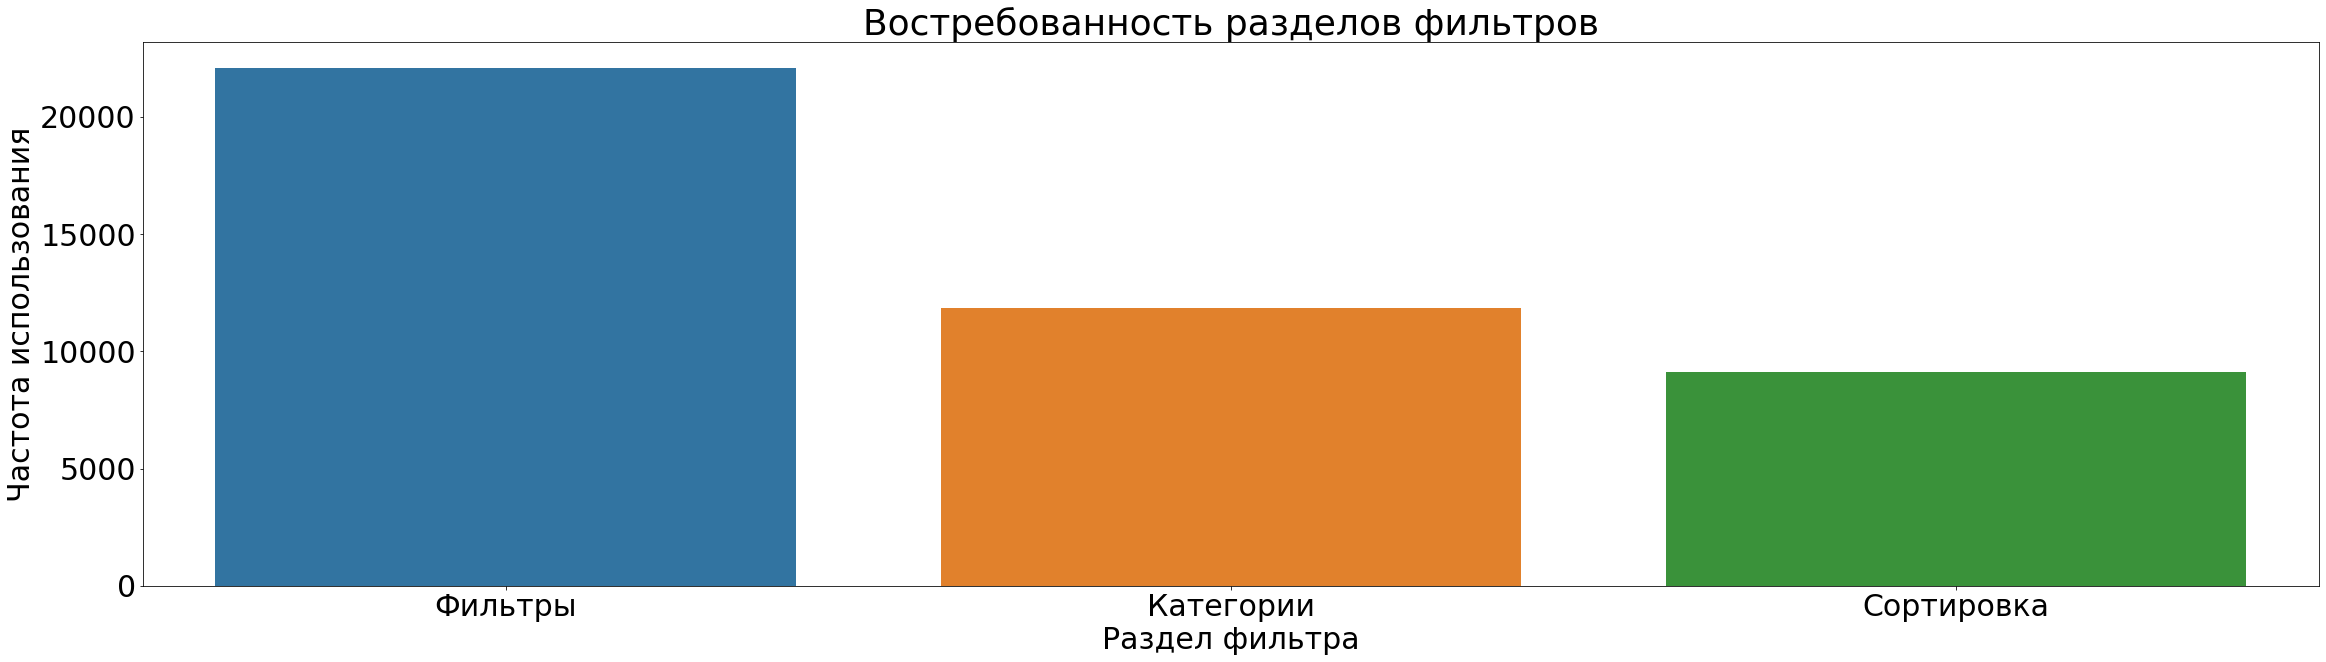

In [21]:
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax2=sns.barplot(Using_different_filters.type, Using_different_filters.count_of_using)
ax2.set_title('Востребованность разделов фильтров')
ax2.set_xlabel('Раздел фильтра')
ax2.set_ylabel('Частота использования')

Ответ: наиболее востребованными из трех разделов фильтров являются: "Фильтры" и их использовали 22084 раза.


# 4 вопрос. Как часто люди пользуются выбором цены?

Необходимо переформулировать вопрос на основе имеющихся данных. Нужно найти то, как часто люди пользуются сортировкой по увеличению цены. 


In [22]:
Sort_cheep_price=data.query('event_action == "filters-categories_click"')
Sort_cheep_price['T_F_cheep_price'] = Sort_cheep_price["event_label"].str.contains("Сначала самые дешевые", regex=False)
Sort_cheep_price

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_category,event_action,event_label,total_events,unique_events,City,T_F_cheep_price
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1,Gelendzhik,False
9,city_landing,filters-categories_click,Krakow / Необычные,3,3,Krakow,False
11,city_landing,filters-categories_click,Barcelona / Сначала самые дешевые,62,50,Barcelona,True
12,city_landing,filters-categories_click,Novorossiysk / Автобусные,42,32,Novorossiysk,False
15,city_landing,filters-categories_click,Sergiev Posad / Групповые,10,8,Sergiev Posad,False
...,...,...,...,...,...,...,...
19074,city_landing,filters-categories_click,Belek / Для детей,21,15,Belek,False
19075,city_landing,filters-categories_click,Rome / На сигвее,1,1,Rome,False
19080,city_landing,filters-categories_click,Istanbul / ЭКСКУРСИИ В СТАМБУЛЕ НА РУССКОМ ЯЗЫ...,1,1,Istanbul,False
19083,city_landing,filters-categories_click,Moscow / ЭКСКУРСИИ МОСКВА,14,10,Moscow,False


In [23]:
Sort_cheep_price.query('T_F_cheep_price == True').total_events.sum()

11075

Ответ: люди пользовались выбором сортировки цен от самых дешевых (занимаются выборов цены) 11075 раз.

# 5 вопрос. Как часто люди фильтруют по ценам? по датам?

Производится расчет общего числа использования фильтров по ценам

In [24]:
#Число использования фильтров по ценам для каждого из трех разновидностей фильтра
data_price_filters = data\
                        .query('event_action == ("price_first", "price_second", "price_third")')\
                        .groupby('event_action', as_index = False)\
                        .agg({'total_events':'sum'})
data_price_filters

,event_action,total_events
0,price_first,8572
1,price_second,2826
2,price_third,904


In [43]:
#Общеее число использования фильтров по ценам
data_price_filters.total_events.sum()

12302

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Частота использования')

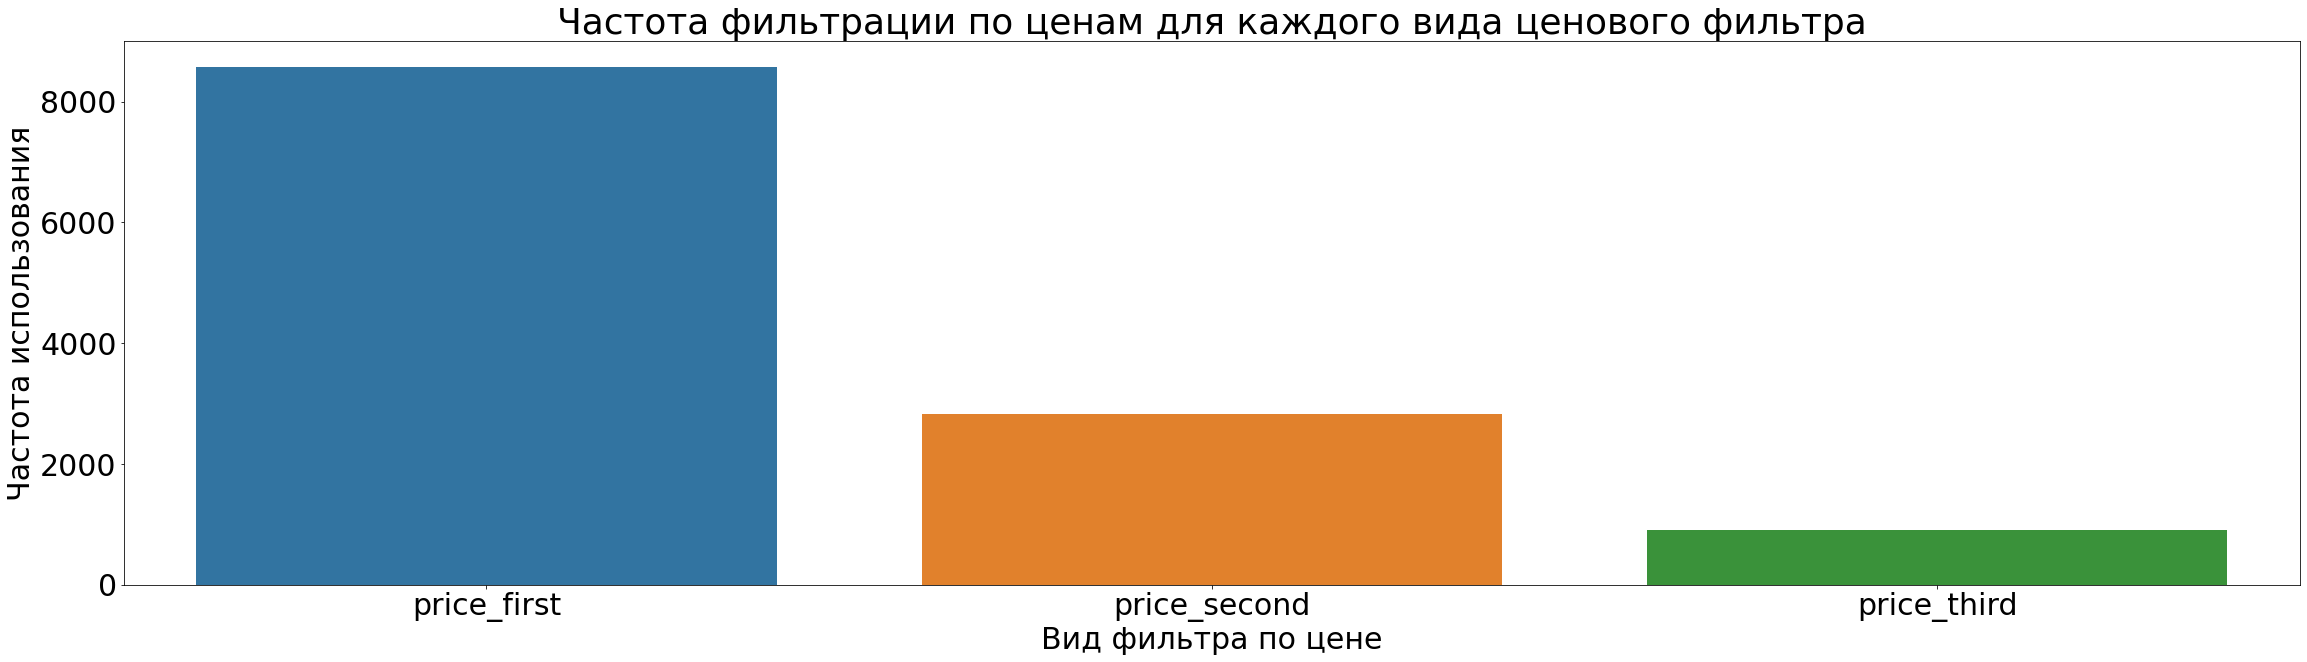

In [47]:
#построение визуализации частоты фильтрации по ценам для каждого вида ценового фильтра
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax2=sns.barplot(data_price_filters.event_action, data_price_filters.total_events)
ax2.set_title('Частота фильтрации по ценам для каждого вида ценового фильтра')
ax2.set_xlabel('Вид фильтра по цене')
ax2.set_ylabel('Частота использования')

Производится расчет общего числа использования фильтров по датам.

In [45]:
#Число использования фильтров по датам для каждого из трех разновидностей фильтра
data_date_filters = data\
                        .query('event_action == ("start_date_click", "end_date_click", "dates_filter_mobile")')\
                        .groupby('event_action', as_index = False)\
                        .agg({'total_events':'sum'})
data_date_filters

,event_action,total_events
0,dates_filter_mobile,13038
1,end_date_click,14638
2,start_date_click,19939


In [44]:
#Общеее число использования фильтров по датам
data_date_filters.total_events.sum()

47615

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Частота использования')

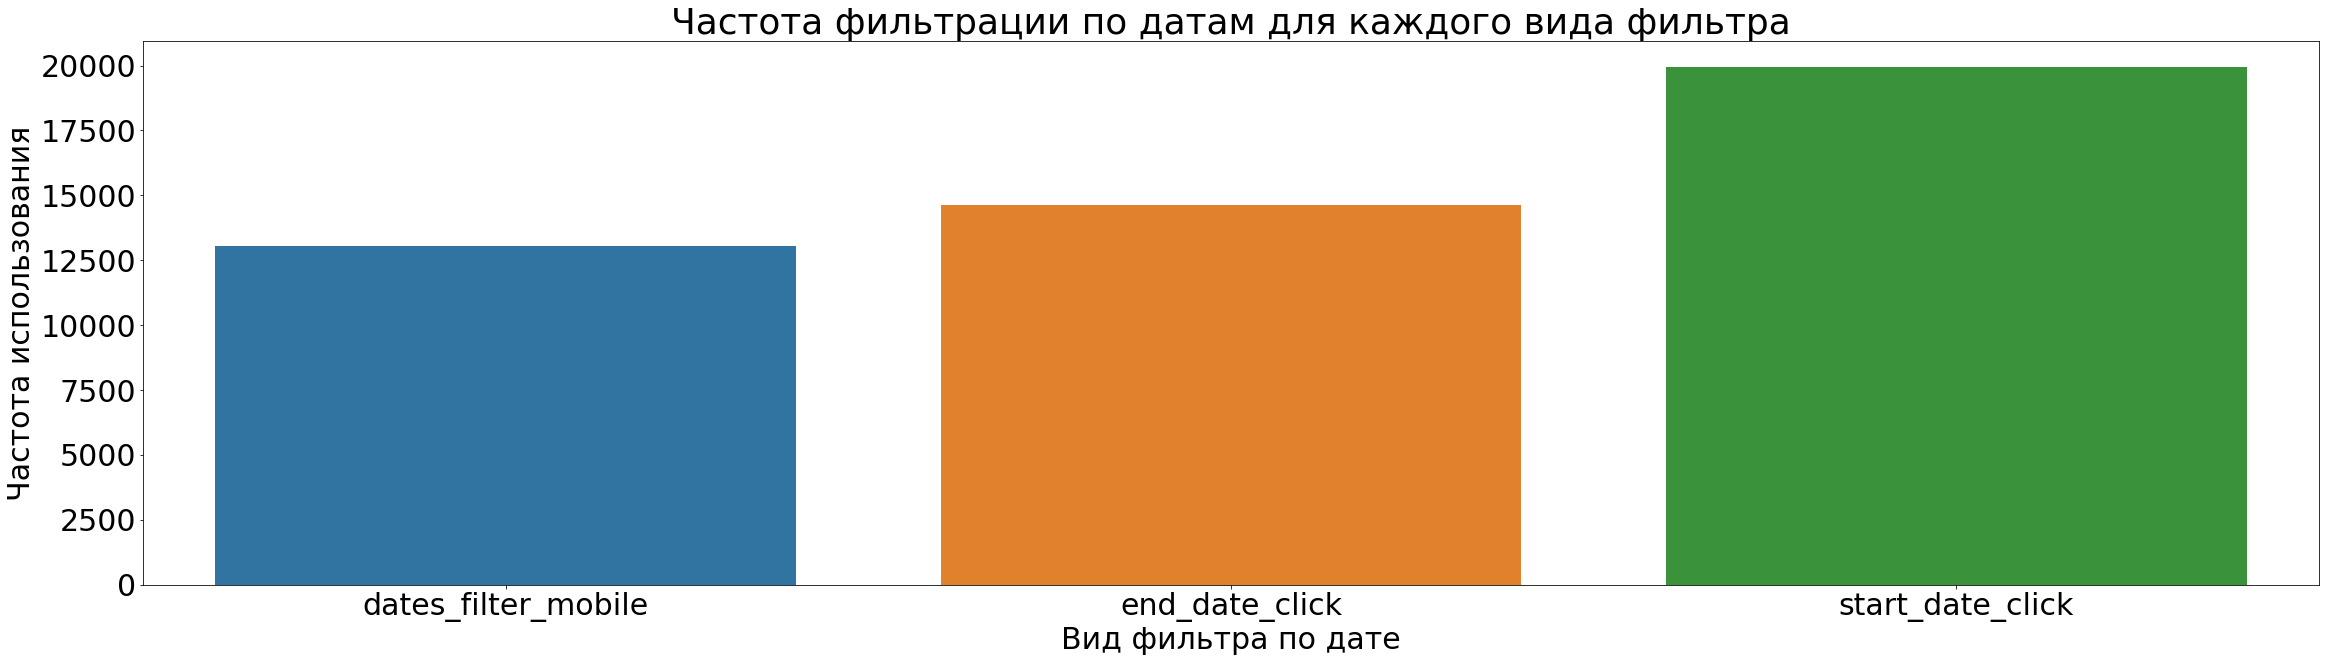

In [48]:
#построение визуализации частоты фильтрации по датам для каждого вида  фильтра дат
font = {'family': 'normal', 'size':'30'}
plt.rc('font',**font)
plt.figure(figsize=(39,10))
ax2=sns.barplot(data_date_filters.event_action, data_date_filters.total_events)
ax2.set_title('Частота фильтрации по датам для каждого вида фильтра')
ax2.set_xlabel('Вид фильтра по дате')
ax2.set_ylabel('Частота использования')

Ответ:

Люди фильтровали по ценам всего 12302 раза. Из них 8572 раза по фильтру по ценам первого варианта, 2826 раз по фильтру второго варианта, и 904 - третьего.

Люди фильтровали по датам всего 47615 раз. Из них 13038 раз по фильтру по датам (сегодня/завтра), 14638 раз по фильтру по датам (календарь) конец, и больше всего 19939 по датам (календарь) начало.

# 6 вопрос. Какие фильтры лишние, невостребованные?

Необходимо пройтись по всем фильтрам. Фильтры дат и цен уже рассматривались выше.



In [31]:
#подсчет числа кликов по фильтру "оплата на месте". Фильтр хорошо используется.
data\
    .query('event_action == "pay-type_checkbox"')\
    .total_events\
    .sum()

7321

In [53]:
#подсчет числа кликов по фильтру мини/инди/группы. Фильтр хорошо используется.
data\
    .query('event_action == "ticket-type_checkbox"')\
    .total_events\
    .sum()

22882

In [39]:
#фильтр по датам (сегодня). Фильтр хорошо используется.
Today_filter = data\
                    .query('event_action == "dates_filter_mobile"')
Today_filter['T_F'] = Today_filter["event_label"]\
                                                .str\
                                                .contains( "Сегодня", regex=False)
Today_filter\
            .query('T_F == True')\
            .total_events\
            .sum()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


6400

In [40]:
#фильтр по датам (завтра). Фильтр хорошо используется.
tomorow_filter = data\
                    .query('event_action == "dates_filter_mobile"')
tomorow_filter['T_F'] = tomorow_filter["event_label"]\
                                                    .str\
                                                    .contains( "Завтра", regex=False)
tomorow_filter\
            .query('T_F == True')\
            .total_events\
            .sum()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


6618

Остается проеверить фильтры для вкладок search-tools-button_open  и filters-categories_click.

Ниже представлена таблица the_less_popular_categories с наименее популярными категориями (на них кликали только 1 раз). В этой таблице значения невостребованных, лишних фильтров

In [41]:
all_categories = data\
                    .query('event_action == "filters-categories_click"')
                    
all_categories.event_label=all_categories\
                                    .event_label\
                                    .apply(lambda x: x.split('/')[1])

all_categories=all_categories.groupby('event_label', as_index=False)\
                                                                .agg({'total_events':'sum'})\
                                                                .sort_values('total_events')
the_less_popular_categories=all_categories.query('total_events <= 1')
the_less_popular_categories

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,event_label,total_events
0,Boat trips,1
473,Популярні,1
451,Пивные,1
441,Палатин,1
438,ПСКОВ ЭКСКУРСИИ ПО ГОРОДУ И ОБЛАСТИ,1
...,...,...
19,Tickets to St. Isaac's Cathedral,1
135,ГРУППОВЫЕ ЭКСКУРСИИ ИЗ КИСЛОВОДСКА,1
134,ГРУППОВЫЕ ЭКСКУРСИИ ИЗ ВЛАДИКАВКАЗА,1
23,Weekend,1


Ниже представлена таблица the_less_popular_filters с наименее популярными категориями (на них кликали только 1 раз).  В этой таблице значения невостребованных, лишних фильтров

In [42]:
all_filters = data\
                    .query('event_action == "search-tools-button_open"')
                    
all_filters.event_label=all_filters\
                                    .event_label\
                                    .apply(lambda x: x.split('/')[1])

all_filters=all_filters.groupby('event_label', as_index=False)\
                                                                .agg({'total_events':'sum'})\
                                                                .sort_values('total_events')
the_less_popular_filters=all_filters.query('total_events <= 1')
the_less_popular_filters.event_label=the_less_popular_filters\
                                                           .event_label\
                                                           .apply(lambda x: x.split(':')[0])
the_less_popular_filters

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,event_label,total_events
0,%2BОБЗОРНАЯ %2BЭКСКУРСИЯ ПО %2BСТАМБУЛУ,1
556,ОБЗОРНАЯ ЭКСКУРСИЯ ПО ВЕЛИКОМУ НОВГОРОДУ НА А...,1
557,ОБЗОРНАЯ ЭКСКУРСИЯ ПО ВЛАДИВОСТОКУ,1
558,ОБЗОРНАЯ ЭКСКУРСИЯ ПО ВЛАДИВОСТОКУ НА АВТОБУСЕ,1
1123,过滤器 选择：0,1
...,...,...
289,Категории ИНДИВИДУАЛЬНЫЕ ЭКСКУРСИИ ПО МОСКВЕ,1
293,Категории Из Тбилиси по Грузии,1
291,Категории ИНДИВИДУАЛЬНЫЕ ЭКСКУРСИИ ПО НИЖНЕМУ...,1
300,Категории КЕМЕР ЭКСКУРСИИ,1


Ответ:

В таблицах "the_less_popular_filters" и  "the_less_popular_categories" представлены фильтры/категории, которые использовались наименьшее число раз (1).
В сумме это 808 названий фильтров. В основном оказываются невостребованными названия, написанные с использованием только прописных букв.